In [327]:
# Prepare the Environment (do not copy and paste...manually type so that you remember what you need and why you are importing the things that you are. You will do this often!)

import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

customers = pd.read_csv("regression.csv")
print(customers)

     customer_id  tenure  monthly_charges total_charges
0     0013-SMEOE      71           109.70       7904.25
1     0014-BMAQU      63            84.65        5377.8
2     0016-QLJIS      65            90.45        5957.9
3     0017-DINOC      54            45.20       2460.55
4     0017-IUDMW      72           116.80       8456.75
5     0019-EFAEP      72           101.30       7261.25
6     0019-GFNTW      56            45.05        2560.1
7     0020-INWCK      71            95.75        6849.4
8     0040-HALCW      54            20.40        1090.6
9     0042-RLHYP      69            19.70        1396.9
10    0056-EPFBG      20            39.40         825.4
11    0057-QBUQH      43            25.10       1070.15
12    0064-SUDOG      12            20.30         224.5
13    0071-NDAFP      25            25.50         630.6
14    0078-XZMHT      72            85.15        6316.2
15    0106-UGRDO      69           116.00       8182.85
16    0114-IGABW      71            58.25       

In [328]:
# Read the information from the customers table into a dataframe.

df = pd.DataFrame(data=customers)
df.head()

,customer_id,tenure,monthly_charges,total_charges
0,0013-SMEOE,71,109.70,7904.25
1,0014-BMAQU,63,84.65,5377.8
2,0016-QLJIS,65,90.45,5957.9
3,0017-DINOC,54,45.20,2460.55
4,0017-IUDMW,72,116.80,8456.75


In [329]:
# How many rows are in your dataframe?

df.shape

(1695, 4)

In [330]:
# What is the data type of the field containing the customer ids? object
df.dtypes

customer_id         object
tenure               int64
monthly_charges    float64
total_charges       object
dtype: object

In [331]:
# Print to the notebook the last 10 rows of your dataframe.

df.tail(10)

,customer_id,tenure,monthly_charges,total_charges
1685,9945-PSVIP,25,18.70,383.65
1686,9950-MTGYX,28,20.30,487.95
1687,9953-ZMKSM,63,25.25,1559.3
1688,9958-MEKUC,72,103.95,7517.7
1689,9959-WOFKT,71,106.70,7382.25
1690,9964-WBQDJ,71,24.40,1725.4
1691,9972-EWRJS,67,19.25,1372.9
1692,9975-GPKZU,46,19.75,856.5
1693,9993-LHIEB,67,67.85,4627.65
1694,9995-HOTOH,63,59.00,3707.6


In [332]:
# What is the inner quartile range of tenure? monthly charges? total charges?

df = df.convert_objects(convert_numeric=True)
df

df['tenure'].quantile(0.75) - df['tenure'].quantile(0.25)
df['monthly_charges'].quantile(0.75) - df['monthly_charges'].quantile(0.25)
df['total_charges'].quantile(0.75) - df['total_charges'].quantile(0.25)

# OR
#df.describe().loc['75%', 'tenure'] - df.describe().loc['25%','tenure']

4721.05

In [333]:
# How many missing values are in each variable? total_charges has 10 missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1695 entries, 0 to 1694
Data columns (total 4 columns):
customer_id        1695 non-null object
tenure             1695 non-null int64
monthly_charges    1695 non-null float64
total_charges      1685 non-null float64
dtypes: float64(2), int64(1), object(1)
memory usage: 53.0+ KB


In [334]:
# Fill any missing values with 0.
df = df.fillna(0)

In [335]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1695 entries, 0 to 1694
Data columns (total 4 columns):
customer_id        1695 non-null object
tenure             1695 non-null int64
monthly_charges    1695 non-null float64
total_charges      1695 non-null float64
dtypes: float64(2), int64(1), object(1)
memory usage: 53.0+ KB


(array([638.,  13.,  48.,  70., 136., 118., 200., 139., 154., 179.]),
 array([ 18.4  ,  28.435,  38.47 ,  48.505,  58.54 ,  68.575,  78.61 ,
         88.645,  98.68 , 108.715, 118.75 ]),
 <a list of 10 Patch objects>)

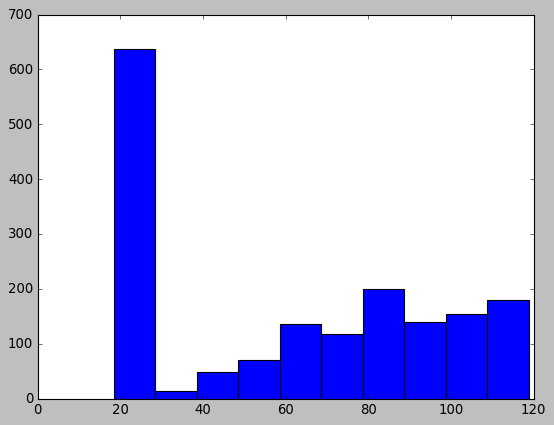

In [408]:
# Show the ditribution of monthly charges through a histogram
plt.hist(df.monthly_charges)

In [337]:
# Create a new dataframe that contains tenure, monthly charges, and total charges, but not the customer id.
df = df.drop(['customer_id'], axis=1)

In [338]:
df

,tenure,monthly_charges,total_charges
0,71,109.70,7904.25
1,63,84.65,5377.80
2,65,90.45,5957.90
3,54,45.20,2460.55
4,72,116.80,8456.75
5,72,101.30,7261.25
6,56,45.05,2560.10
7,71,95.75,6849.40
8,54,20.40,1090.60
9,69,19.70,1396.90


(0, 9000)

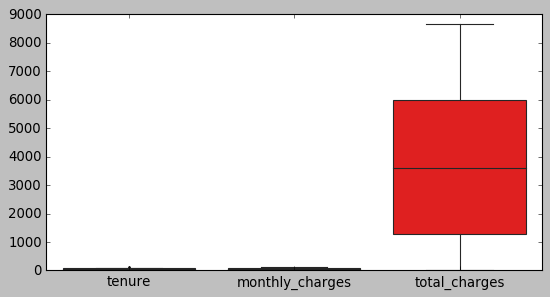

In [339]:
# Create a box plot of each variable in your new dataframe. This should be a single chart with 3 categorical plots, 1 each for tenure, monthly charges, total charges.
plt.figure(figsize=(8,4))
sns.boxplot(data=df)
plt.ylim(0, 9000)



In [340]:
# Split your data into a test and train dataset. Set the random_state to 123. You should end up with 4 dataframes: X_train, X_test, y_train, y_test.
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Wrangling
import pandas as pd

# Exploring
import scipy.stats as stats

# Visualizing
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('classic')

# Modeling
import statsmodels.api as sm

from scipy.stats import pearsonr

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, median_absolute_error


In [341]:
X = df[['tenure', 'monthly_charges']]
y= df[['total_charges']]

X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=.80, random_state=123)

train = pd.concat([X_train, y_train], axis=1)
test = pd.concat([X_test, y_test], axis=1)

train

,tenure,monthly_charges,total_charges
909,66,85.90,5595.30
550,71,105.55,7405.50
1173,60,110.60,6586.85
5,72,101.30,7261.25
1536,72,110.15,7881.20
1331,72,59.75,4265.00
1094,48,108.10,5067.45
1078,72,85.30,6129.20
737,70,24.25,1724.15
119,70,75.50,5212.65


In [342]:
if X_train.shape[0] == y_train.shape[0]:
    print('X & y train rows ARE equal')
else:
    print('X & y train rows ARE NOT equal')
    
if X_test.shape[0] == y_test.shape[0]:
    print('X & y test rows ARE equal')
else:
    print('X & y test rows ARE NOT equal')
    
if train.shape[1] == test.shape[1]:
    print('Number of columns in train & test ARE equal')
else:
    print('Number of columns in train & test ARE NOT equal')

train_split = train.shape[0] / (train.shape[0] + test.shape[0])
test_split = test.shape[0] / (train.shape[0] + test.shape[0])

print("Train Split: %.2f" % train_split)
print("Test Split: %.2f" % test_split)

X & y train rows ARE equal
X & y test rows ARE equal
Number of columns in train & test ARE equal
Train Split: 0.80
Test Split: 0.20


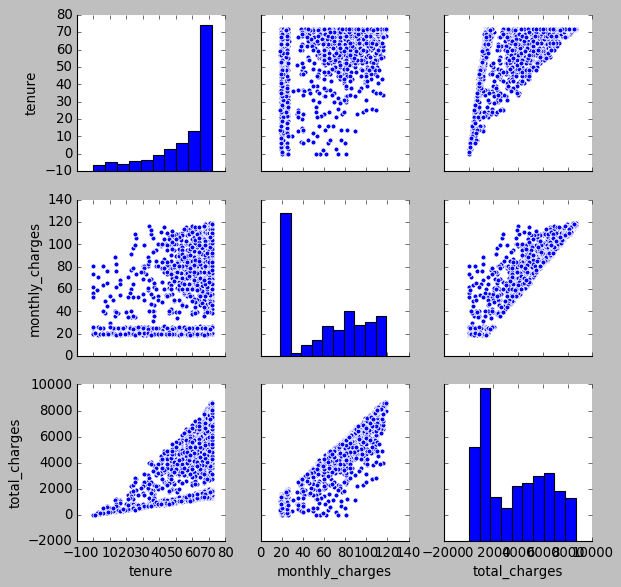

In [411]:
# Create a scatterplot for each combination of variables.
sns.pairplot(df)

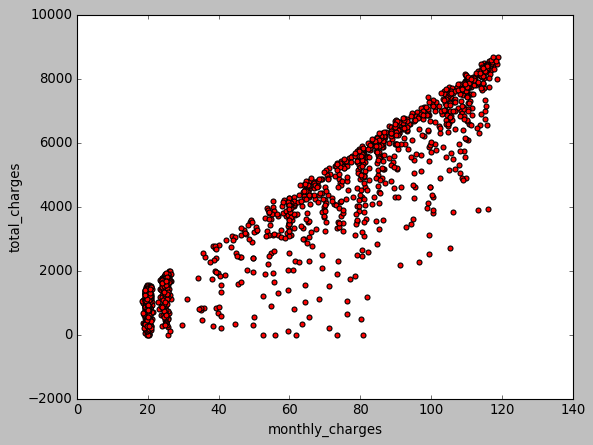

In [343]:

train.plot.scatter(x='monthly_charges', y='total_charges',c='red')

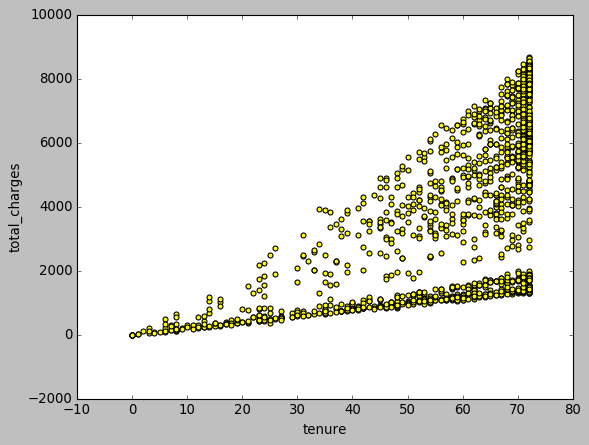

In [344]:
train.plot.scatter(x='tenure', y='total_charges',c='yellow')

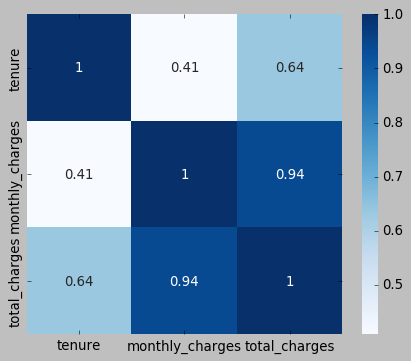

In [345]:
# Create a heatmap containing the 3 variables.
plt.figure(figsize=(14,5))
plt.subplot(121)
sns.heatmap(train.corr(), cmap='Blues', annot=True)

In [407]:
# Compute pearson's correlation coefficient and print it's value in the sentence "Pearson's R is ____ with a significance p-value of ____"
# pearsons_r = [[column, pearsonr(train[column], train.total_charges)] for column in X_train] 

for col in X_train:
    r, p = pearsonr(X_train[col], y_train.total_charges)
    print('Pearson\'s R is {:.2%} with a significance p-value of {:.2E}'.format(r, p))
    


Pearson's R is 63.50% with a significance p-value of 5.69E-154
Pearson's R is 94.17% with a significance p-value of 0.00E+00


In [347]:
# Train (aka fit) a linear regression model, modeling total charges as a linear function of tenure.
lm1 = LinearRegression(fit_intercept=False)
print(lm1)


LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None,
         normalize=False)


In [348]:
lm1.fit(X_train[['tenure']], y_train)
print(lm1)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None,
         normalize=False)


In [349]:
# What is the y-intercept of the regression line? Translate the intercept in plain english, i.e. what is means in the context of the data.
lm1_y_intercept = lm1.intercept_
print(lm1_y_intercept)

# What the slope of the regression line? Translate the slope in plain english, i.e. what is means in the context of the data.
lm1_coefficients = lm1.coef_
print(lm1_coefficients)
# Zero intercept is zero total_charges
# As tenure goes up one unit, the total_charges will go up by $67.8

0.0
[[67.81557644]]


In [350]:
# Write the linear function in the form of y=mx+b using the parameters that were estimated from the algorithm and the variable names for y and x specific to your data.
# total_charges = 0 + 67.8(tenure)



In [351]:
# y_pred_lm1 = lm1.predict(X_train.drop(columns=['monthly_charges']))

In [352]:
# Test your model on the training sample. That is, use your newly fit model to predict the total charges using tenure.
y_pred_lm1 = lm1.predict(X_train[['tenure']])
y_pred_lm1[0]

array([4475.82804516])

In [353]:
X_train.head()

,tenure,monthly_charges
909,66,85.90
550,71,105.55
1173,60,110.60
5,72,101.30
1536,72,110.15


In [354]:
# Evaluate the model's performance using mean squared error
mse_lm1 = mean_squared_error(y_train, y_pred_lm1)
print("lm1\n  mse: {:.3}".format(mse_lm1))

lm1
  mse: 4.21e+06


In [355]:
# Evaluate the model's performance using r-squared
r2_lm1 = r2_score(y_train, y_pred_lm1)
print('  {:.2%} of the variance in the total charges can be explained by tenure.'.format(r2_lm1))

  37.46% of the variance in the total charges can be explained by tenure.


In [356]:
# Evaluate the model's performance using median absolute error.
mae_lm1 = median_absolute_error(y_train, y_pred_lm1)
print("lm1\n  mae: {:.3}".format(mae_lm1))

lm1
  mae: 1.73e+03


In [357]:
# Test your model on the test sample.
y_pred_lm1_test = lm1.predict(X_test[['tenure']])
y_pred_lm1_test[0]

array([678.15576442])

In [358]:
# Evaluate your model's performance on test sample. How do each of the metrics compare to that of the training sample? How can you explain the reason for the difference?
# r^2 and the median absolute error are about the same. 
mse = mean_squared_error(y_test, y_pred_lm1_test)

print("Mean squared error: %.2f" % mse)

Mean squared error: 3881232.75


In [359]:
r2 = r2_score(y_test, y_pred_lm1_test)

print('{:.2%} of the variance in the total_charges can be explained by tenure.'
      .format(r2))

38.34% of the variance in the total_charges can be explained by tenure.


In [360]:
mae_lm1_test = median_absolute_error(y_test, y_pred_lm1_test)
print("lm1\n  mae: {:.3}".format(mae_lm1_test))

lm1
  mae: 1.59e+03


In [362]:
# Calculate the p-value of the regressor for the train and test sample. Hint: f_regression
from sklearn.feature_selection import f_regression
f_regression(X_test, y_test, center=True)

(array([ 231.6718391 , 2663.48364019]),
 array([3.48651193e-040, 4.59644491e-162]))

Text(0.5, 1.0, 'Predicted vs Actual Total Charges')

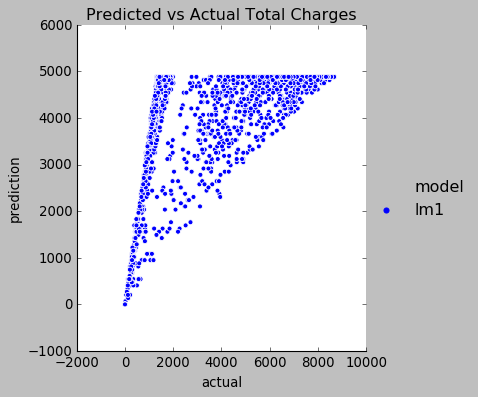

In [367]:
# Create a scatter plot of the predicted values versus the actual values in the test sample.
pd.DataFrame({'actual': y_train.total_charges,
              'lm1': y_pred_lm1.ravel()})\
    .melt(id_vars=['actual'], var_name='model', value_name='prediction')\
    .pipe((sns.relplot, 'data'), x='actual', y='prediction', hue='model')

plt.title('Predicted vs Actual Total Charges')

Text(0.5, 1.0, 'Actual Values of x and y With Regression Line')

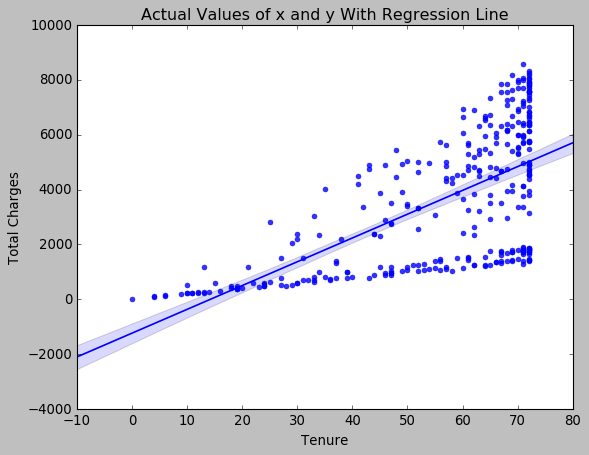

In [401]:
# Create a scatter plot of the actual values of x and y in the test sample with the regression line layered over.
pd.DataFrame({'Tenure': X_test.tenure.ravel(),
              'Total Charges': y_test.total_charges.ravel()})\
    .pipe((sns.regplot, 'data'), x='Tenure', y='Total Charges')


plt.title('Actual Values of x and y With Regression Line')


Text(0, 0.5, 'Residuals')

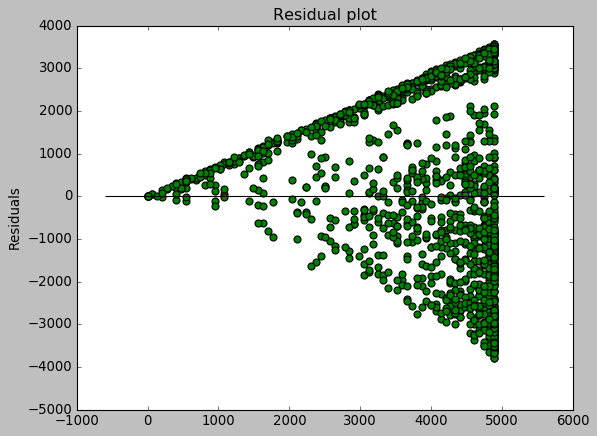

In [391]:
# Create a scatter plot of the residuals (x axis: predicted values of final grade, y axis: the residual 
# values (remember definition of residual from previous lesson). Layer over it a horizonal line that represents 
# no residual.
plt.scatter(y_pred_lm1, y_pred_lm1 - y_train, c='g', s=40)
plt.hlines(y=0, xmin=-600, xmax=5600)
plt.title("Residual plot")
plt.ylabel('Residuals')